In [1]:
# installing the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

In [2]:
df = pd.read_csv('cars.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


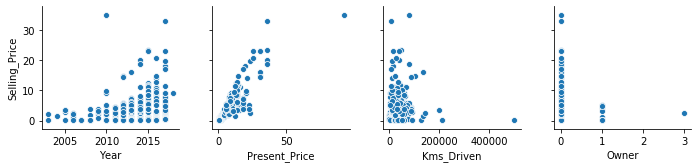

In [15]:
g2 = sns.pairplot(
    df,
    x_vars=["Year", "Present_Price", "Kms_Driven", "Owner"],
    y_vars=["Selling_Price"], palette="Blues"
)
#g2.map_offdiag(sns.regplot, scatter_kws={"s": 1}, ci=None);

In [5]:
car_attributes = df[['Year', 'Present_Price', 'Kms_Driven']]
selling_price = df[['Selling_Price']]

In [6]:
car_attributes.head()

,Year,Present_Price,Kms_Driven
0,2014,5.59,27000
1,2013,9.54,43000
2,2017,9.85,6900
3,2011,4.15,5200
4,2014,6.87,42450


In [7]:
selling_price.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [8]:
model = xgboost.train({"learning_rate": 0.001}, xgboost.DMatrix(car_attributes, label=selling_price), 10000)

In [9]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(car_attributes)

In [10]:
shap_values

array([[ 1.44332990e-01, -1.28940809e+00,  1.76422708e-02],
       [-7.54181564e-01,  1.14618611e+00, -9.36977044e-02],
       [ 1.35425961e+00,  1.64099550e+00, -1.45913512e-01],
       [-5.97875714e-01, -1.42442787e+00,  1.41251519e-01],
       [ 1.23568192e-01, -3.07048202e-01, -9.11186114e-02],
       [ 1.73765445e+00,  2.28088117e+00,  4.79837149e-01],
       [ 6.29994452e-01,  1.18580675e+00,  1.52781874e-01],
       [ 6.56439364e-01,  1.12303770e+00, -9.36690252e-03],
       [ 1.43334639e+00,  2.14203382e+00,  2.64770061e-01],
       [ 7.98366964e-01,  1.86270547e+00, -1.48307637e-03],
       [ 6.25956595e-01, -2.59604478e+00,  2.04443872e-01],
       [ 7.63212740e-01,  1.66891170e+00, -6.41371161e-02],
       [ 6.60918474e-01,  1.71671212e+00,  4.24659044e-01],
       [ 6.44667387e-01,  4.22661841e-01,  8.35190639e-02],
       [-1.86682343e+00, -3.77008468e-01, -1.23949036e-01],
       [ 1.30705369e+00,  1.92969513e+00, -1.60195425e-01],
       [ 8.23610067e-01,  1.80437303e+00

In [11]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, car_attributes)

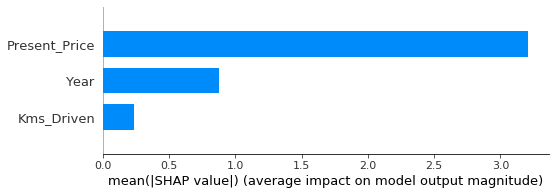

In [12]:
shap.summary_plot(shap_values, car_attributes, plot_type="bar")

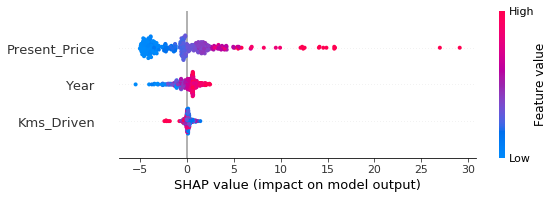

In [13]:
shap.summary_plot(shap_values, car_attributes)